In [72]:
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

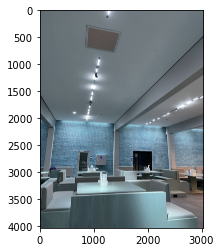

In [73]:
image = cv2.imread("Class.JPG")
plt.imshow(image)

The image looks weird (You can see that it's a little bit colder)because opencv loads the image as BGR while matplotlib displays it as RGB. We can use the following function to switch the chanels. 

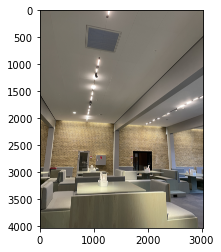

In [74]:
Cimg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(Cimg)

## Programming exercises: Pinhole camera

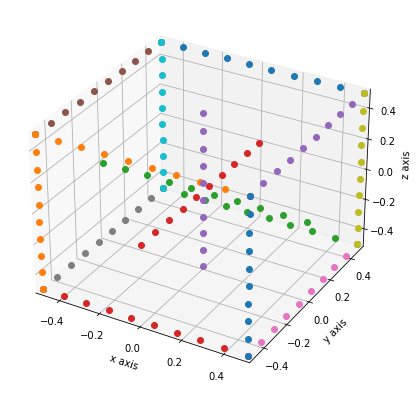

In [75]:
# Create a figure, and specify the size  
fig = plt.figure(figsize=(15,15))
# Create axes 
ax = fig.add_subplot(121, projection='3d')
# We then create a 3-D axis object by calling the add_subplot method and specifying the value ‘3d’ to the projection parameter.
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

# Number of dots 
n = 10

cte = np.ones(n)*0.5
m = np.linspace(-0.5,0.5,n)

ax.plot(m, cte, cte, 'o')
ax.plot(m,-cte, cte, 'o')
ax.plot(m, cte,-cte, 'o')
ax.plot(m,-cte,-cte, 'o')

ax.plot( cte, m, cte, 'o')
ax.plot(-cte, m, cte, 'o')
ax.plot( cte, m,-cte, 'o')
ax.plot(-cte, m,-cte, 'o')

ax.plot( cte, cte, m, 'o')
ax.plot(-cte, cte, m, 'o')
ax.plot( cte,-cte, m, 'o')
ax.plot(-cte,-cte, m, 'o')

cte2 = np.zeros(n)
ax.plot( m, cte2, cte2, 'o')
ax.plot( cte2, m, cte2, 'o')
ax.plot( cte2, cte2, m, 'o')

# Summary: m always remains positive. The other variables comprehend the full iteraions of (+,-)
   
# plt.show()

In [76]:
def box3d(n):
    # Define some variables
    m = np.linspace(-0.5,0.5,n)
    # Define the cte for the outside edges
    c = np.ones(n)*0.5
    # Cte for the inside edges
    c2 = np.zeros(n)
    # Empty 2d matrix to store all the values 
    B = np.array([[], [], []])
    # Signs for the outside edges
    signs = np.array([[1,1],[-1,1],[1,-1],[-1,-1]])
    
    for j in range(3):

        for i in range(4):
            if j == 0:
                A = np.array(m)
                A = np.vstack([A,c*signs[i][0]])
                A = np.vstack([A,c*signs[i][1]])
                B = np.concatenate((B,A),1)
            if j == 1:
                A = np.array(c*signs[i][0])
                A = np.vstack([A,m])
                A = np.vstack([A,c*signs[i][1]])
                B = np.concatenate((B,A),1)
            if j == 2:
                A = np.array(c*signs[i][0])
                A = np.vstack([A,c*signs[i][1]])
                A = np.vstack([A,m])
                B = np.concatenate((B,A),1)
    
        A= A*0
        A[j] = m
        B = np.concatenate((B,A),1)
    
    return B

Check if the matrix is correct

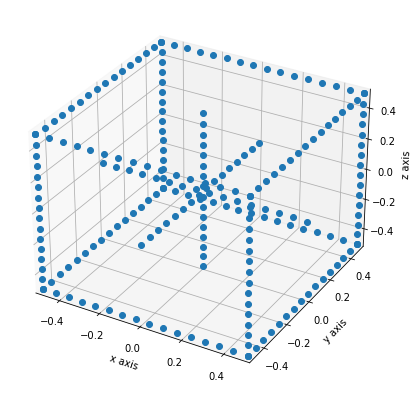

In [77]:
B = box3d(16)
B
# Create a figure, and specify the size  
fig = plt.figure(figsize=(15,15))
# Create axes 
ax = fig.add_subplot(121, projection='3d')
# We then create a 3-D axis object by calling the add_subplot method and specifying the value ‘3d’ to the projection parameter.
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

ax.plot(B[0], B[1], B[2], 'o')

## Apply translation and convert 3d points into a 2d projection 

In [78]:
def projectpoints(K:np.matrix, R:np.matrix,t:np.array,P:np.matrix):
    if t.shape != (1,3):
        t = np.expand_dims(t, axis=1)
        
    _,n = P.shape
    P = np.vstack([P, np.ones((1,n))])
    R = np.concatenate((R,t), axis=1)
    p3d = K@R@P
    
    qx = p3d[0]/p3d[-1]
    qy = p3d[1]/p3d[-1]
    
    p2d = np.concatenate((qx, qy))
    
    return p3d, p2d

In [79]:
R = np.matrix(np.eye(3))
t = np.array([0, 0, 4])
K = R

In [81]:
b3, b2  = projectpoints(K,R,t,B)

In [82]:
b3[0][0]

matrix([[-0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
         -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
          0.16666667,  0.23333333,  0.3       ,  0.36666667,  0.43333333,
          0.5       , -0.5       , -0.43333333, -0.36666667, -0.3       ,
         -0.23333333, -0.16666667, -0.1       , -0.03333333,  0.03333333,
          0.1       ,  0.16666667,  0.23333333,  0.3       ,  0.36666667,
          0.43333333,  0.5       , -0.5       , -0.43333333, -0.36666667,
         -0.3       , -0.23333333, -0.16666667, -0.1       , -0.03333333,
          0.03333333,  0.1       ,  0.16666667,  0.23333333,  0.3       ,
          0.36666667,  0.43333333,  0.5       , -0.5       , -0.43333333,
         -0.36666667, -0.3       , -0.23333333, -0.16666667, -0.1       ,
         -0.03333333,  0.03333333,  0.1       ,  0.16666667,  0.23333333,
          0.3       ,  0.36666667,  0.43333333,  0.5       , -0.5       ,
         -0.43333333, -0.36666667, -0.

### Visualize

In [84]:
type(b3)

numpy.matrix

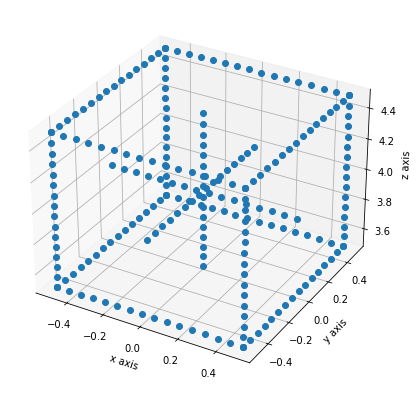

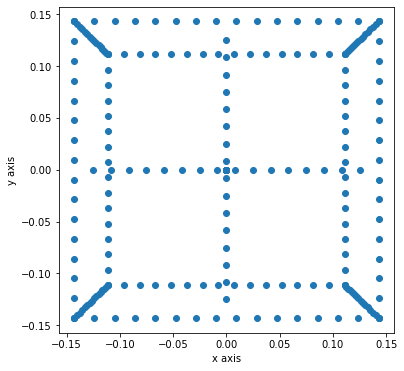

In [33]:
# Create a figure, and specify the size  
fig = plt.figure(figsize=(15,15))
# Create axes 
ax = fig.add_subplot(121, projection='3d')
# We then create a 3-D axis object by calling the add_subplot method and specifying the value ‘3d’ to the projection parameter.

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

b3, b2 = np.array(b3), np.array(b2)
ax.plot(b3[0],b3[1] ,b3[2], 'o')
plt.show()




fig = plt.figure(figsize=(6,6))
ax = plt.subplot()
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.plot(b2[0], b2[1], 'o')


## Apply rotation 

In [34]:
K = np.matrix(np.eye(3))
t = np.array([0, 0, 4])
# print(R)
R = np.matrix(np.eye(3))
print(K)




[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [35]:
theta = 30
u = np.array([np.cos(theta), 0, np.sin(theta)])
R[0] = u

v = u[::-1]
v[0] = v[0]*-1
R[-1] = v

K

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [36]:
b3, b2  = projectpoints(K,R,t,B)

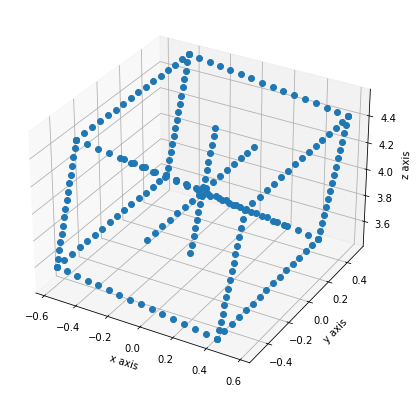

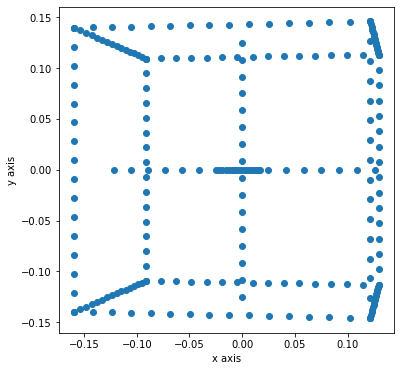

In [37]:
# Create a figure, and specify the size  
fig = plt.figure(figsize=(15,15))
# Create axes 
ax = fig.add_subplot(121, projection='3d')
# We then create a 3-D axis object by calling the add_subplot method and specifying the value ‘3d’ to the projection parameter.

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

b3, b2 = np.array(b3), np.array(b2)
ax.plot(b3[0],b3[1] ,b3[2], 'o')
plt.show()




fig = plt.figure(figsize=(6,6))
ax = plt.subplot()
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.plot(b2[0], b2[1], 'o')

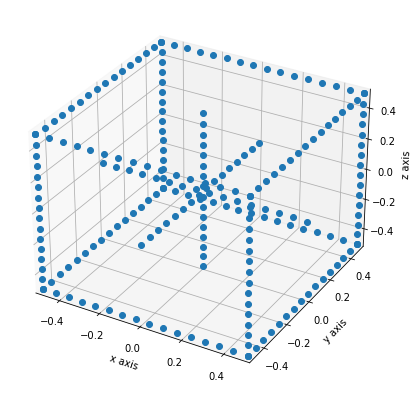

In [38]:
# Create a figure, and specify the size  
fig = plt.figure(figsize=(15,15))
# Create axes 
ax = fig.add_subplot(121, projection='3d')
# We then create a 3-D axis object by calling the add_subplot method and specifying the value ‘3d’ to the projection parameter.
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

ax.plot(B[0], B[1], B[2], 'o')

In [70]:
def plot3d(A, fsize:tuple=(15,15), lim: tuple= None):
    
    fig = plt.figure(figsize=fsize)
    ax = fig.add_subplot(121, projection='3d')
    
    if lim:
        max, min = lim[0], lim[1]
        
        ax.set_xlim(min,max)
        ax.set_ylim(min,max)
        ax.set_zlim(min,max)
        
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')

    ax.plot(A[0], A[1], A[2], 'o')

In [85]:
plot3d(b3)

ValueError: input operand has more dimensions than allowed by the axis remapping

AttributeError: 'Line3D' object has no attribute '_verts3d'

<Figure size 1080x1080 with 1 Axes>

In [67]:
def plot2d(A, fsize:tuple=(6,6), lim: tuple= None):
    
    fig = plt.figure(figsize=fsize)
    ax = plt.subplot()
    
    if lim:
        max, min = lim[0], lim[1]
        
        ax.set_xlim(min,max)
        ax.set_ylim(min,max)
        
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')

    ax.plot(A[0], A[1], 'o')

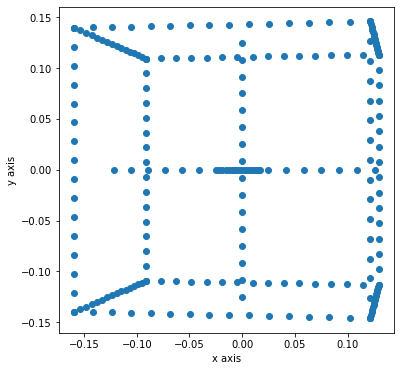

In [68]:
plot2d(b2)